<a href="https://colab.research.google.com/github/sujataprasad01/ML-Market-Basket-Analysis/blob/main/Apriori_Algorithm_(Market_Basket_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Installing the apyori to perform the Apriori

In [3]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=08bf4acc65c3696bfa6e9f32ce709c2fe95b2bc7ad76775b522d5a1b041663d4
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [4]:
from apyori import apriori

# Importing Dataset

In [7]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv")

In [8]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.shape

(38765, 3)

In [ ]:
df.size

116295

In [ ]:
df.ndim

2

In [ ]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.head(1)

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit


In [ ]:
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [ ]:
df.itemDescription.value_counts().nlargest(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [ ]:
df.itemDescription.value_counts().nsmallest(10)
#df.itemDescription.value_counts().tail(10).sort_values()

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

<Axes: >

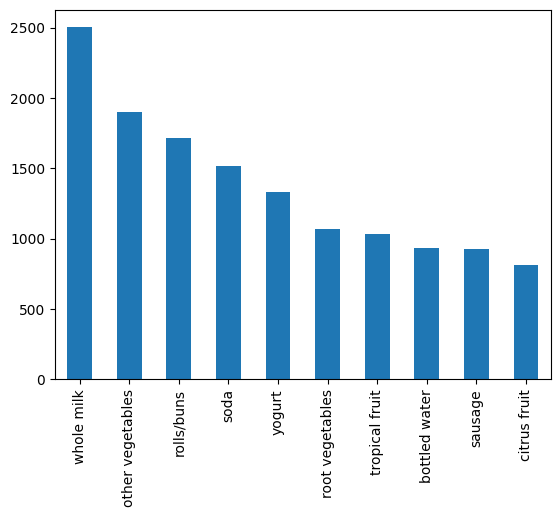

In [ ]:
df['itemDescription'].value_counts().nlargest(10).plot.bar()

<Axes: >

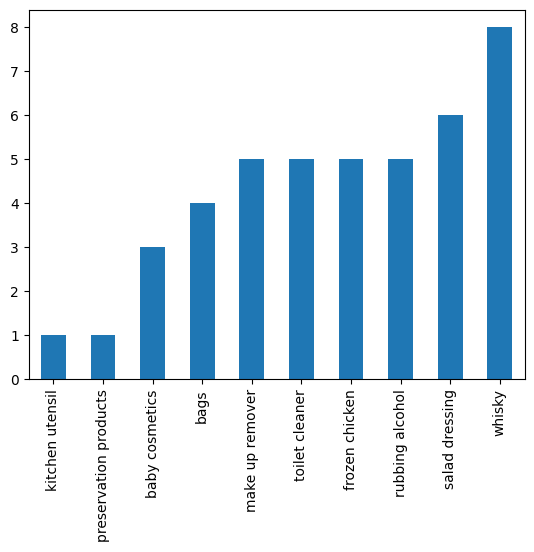

In [ ]:
df['itemDescription'].value_counts().nsmallest(10).plot.bar()

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


<Axes: >

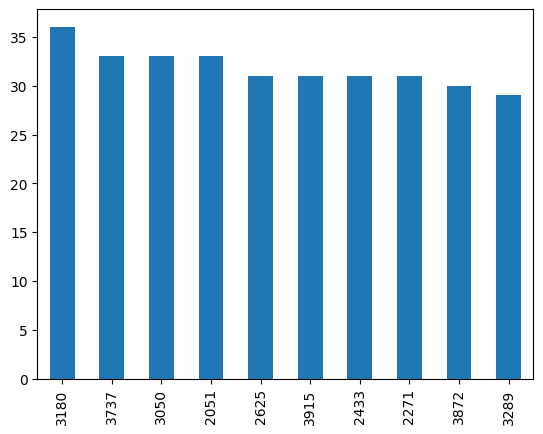

In [ ]:
df['Member_number'].value_counts().nlargest(10).plot.bar()

In [9]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [11]:
df.Date.value_counts().nlargest(10)

21-01-2015    96
21-07-2015    93
29-11-2015    92
08-08-2015    92
30-04-2015    91
28-08-2014    88
26-03-2015    88
30-09-2015    87
19-06-2015    85
16-05-2015    85
Name: Date, dtype: int64

In [19]:
df.Date[0][6:]

'2015'

In [23]:
x=[]
for i in range(len(df.Date)):
  li=df.Date[i][6:]
  x.append(li)


In [28]:
df['Month']=pd.DatetimeIndex(df['Date']).month

<ipython-input-28-436711716360>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month']=pd.DatetimeIndex(df['Date']).month


In [29]:
df['Day']=pd.DatetimeIndex(df['Date']).day

<ipython-input-29-b98134eafa77>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day']=pd.DatetimeIndex(df['Date']).day


In [24]:
df['Year']=x

In [25]:
df.head()

,Member_number,Date,itemDescription,Year
0,1808,21-07-2015,tropical fruit,2015
1,2552,05-01-2015,whole milk,2015
2,2300,19-09-2015,pip fruit,2015
3,1187,12-12-2015,other vegetables,2015
4,3037,01-02-2015,whole milk,2015


In [26]:
df.Year.value_counts()

2015    20488
2014    18277
Name: Year, dtype: int64

In [31]:
df.Month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: Month, dtype: int64

In [32]:
df.Day.value_counts()

28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
4     1308
10    1308
11    1297
5     1290
24    1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: Day, dtype: int64

In [36]:
df[df.Year=='2015']

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2
...,...,...,...,...,...,...
37114,1185,24-08-2015,chocolate,2015,8,24
37115,4656,25-12-2015,newspapers,2015,12,25
37116,2741,11-09-2015,canned vegetables,2015,11,9
37117,2654,17-08-2015,coffee,2015,8,17


In [47]:
df.Month[df.Year=='2015'].value_counts().nlargest(1)

8    1963
Name: Month, dtype: int64

In [57]:
df.Day[(df.Year=='2015') & (df.Month=='8')].value_counts()

Series([], Name: Day, dtype: int64)

# Aprori Implementation

In [58]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [59]:
data=df.copy()

In [62]:
data=pd.get_dummies(data['itemDescription'])

In [60]:
data1=data.copy()